In [217]:
import pandas as pd  
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
path = r"C:\Users\User\Documents\GitHub\Data_Analytics_Projects-\Youtube_Commercial\UScomments.csv"
comments = pd.read_csv(path, on_bad_lines = 'skip')

In [219]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [220]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [221]:
comments.dropna(inplace = True)

In [222]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [223]:
from textblob import TextBlob

In [224]:
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [225]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [226]:
comments.shape

(691374, 4)

In [227]:
sample_df = comments[0:1000]
sample_df.shape

(1000, 4)

In [228]:
def get_polarity(comment):
    try:
        return TextBlob(comment).sentiment.polarity
    except:
        return 0

polarity = (get_polarity(comment) for comment in comments['comment_text'])
polarity_list = list(polarity)


In [229]:
len(polarity_list)

691374

In [230]:
comments['polarity'] = polarity_list

In [232]:
comments[comments['polarity'] == 1]

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [233]:
filter1 = comments['polarity'] == 1
comments_positive = comments[filter1]

In [234]:
filter2 = comments['polarity'] == -1
comments_negative = comments[filter2]

In [235]:
from wordcloud import WordCloud, STOPWORDS

In [236]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [237]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [238]:
type(comments['comment_text'])

pandas.core.series.Series

In [239]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [240]:
wordcloud1 = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_positive)

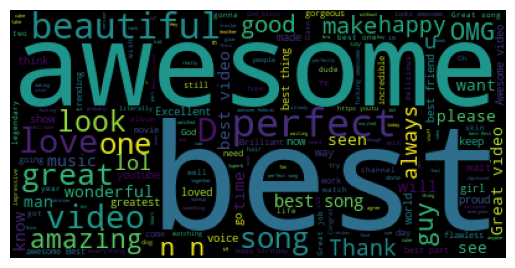

In [346]:
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [242]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

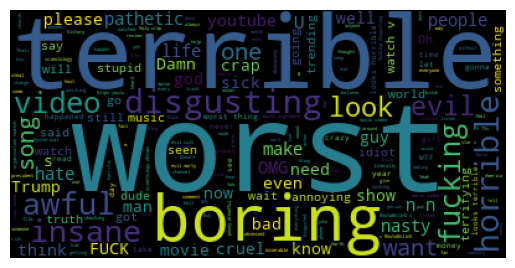

In [347]:
wordcloud2 = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_negative)
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [244]:
import emoji
emoji.__version__

'2.14.0'

In [245]:
comments['comment_text'].head()

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
Name: comment_text, dtype: object

In [246]:
comment = 'trending 😉'

In [247]:
emoji_list = [char for char in comment if char in emoji.EMOJI_DATA]

In [248]:
emoji_list

['😉']

In [249]:
all_emojis_list = []
for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [250]:
all_emojis_list[:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [251]:
from collections import Counter

In [252]:
emoji_counter = Counter(all_emojis_list).most_common(10)
emoji_counter_dict = dict(emoji_counter)
emoji_counter_dict

{'😂': 36987,
 '😍': 33453,
 '❤': 31119,
 '🔥': 8694,
 '😭': 8398,
 '👏': 5719,
 '😘': 5545,
 '👍': 5476,
 '💖': 5359,
 '💕': 5147}

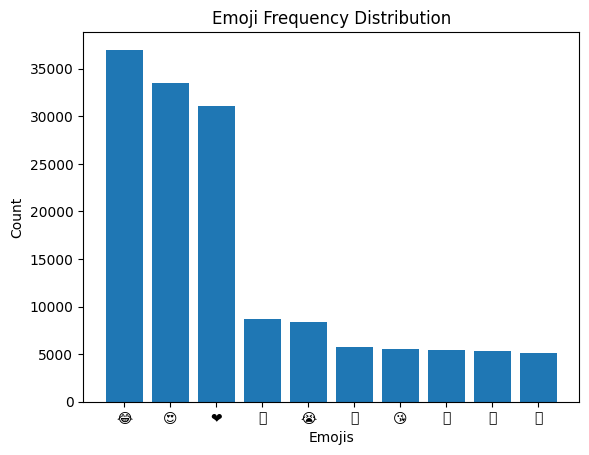

In [253]:
plt.bar(emoji_counter_dict.keys(), emoji_counter_dict.values())
plt.xlabel("Emojis")
plt.ylabel("Count")
plt.title("Emoji Frequency Distribution")
plt.show()

In [254]:
fig = go.Figure(
    [go.Bar(
        x = list(emoji_counter_dict.keys()),  # X-axis: emojis
        y = list(emoji_counter_dict.values()),  # Y-axis: frequencies
        marker = dict(color = 'rgb(200, 100, 100)'),  # Custom bar color
        name = 'Emoji Frequency'  # Name for the data
    )]
)

# Update the layout with titles
fig.update_layout(
    title='Emoji Frequency Distribution',  # Chart title
    xaxis_title='Emojis',  # X-axis title
    yaxis_title='Frequency'  # Y-axis title
)

# Display the plot
fig.show(renderer='browser')

In [255]:
import os

In [ ]:
files = os.listdir(r'C:\Users\User\Documents\GitHub\Data_Analytics_Projects-\Youtube_Commercial\additional_data')
files


['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json',
 'youtube_sample.csv',
 'youtube_sample.json',
 'youtube_sample.sqlite']

In [257]:
files_csv = [file for file in files if '.csv' in file]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv',
 'youtube_sample.csv']

In [258]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
full_df = pd.DataFrame()
path = r'C:\Users\User\Documents\GitHub\Data_Analytics_Projects-\Youtube_Commercial\additional_data'

for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding = 'iso-8859-1', on_bad_lines = 'skip')
    full_df = pd.concat([full_df, current_df], ignore_index = True)


In [260]:
full_df.shape

(376942, 16)

In [261]:
full_df.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19504
dtype: int64

In [262]:
full_df[full_df.duplicated].shape

(36818, 16)

In [263]:
print(f'Before dropping dublicates: {full_df.shape}')
full_df.drop_duplicates(inplace = True, keep = 'first')
print(f'After dropping dublicates: {full_df.shape}')

Before dropping dublicates: (376942, 16)
After dropping dublicates: (340124, 16)


In [ ]:
full_df[0:1_000].to_json(r'C:\Users\User\Documents\GitHub\Data_Analytics_Projects-\Youtube_Commercial\additional_data\youtube_sample.json')

In [265]:
from sqlalchemy import create_engine

In [ ]:
engine = create_engine(r'sqlite:///C:\Users\User\Documents\GitHub\Data_Analytics_Projects-\Youtube_Commercial\additional_data\youtube_sample.sqlite')

In [267]:
full_df[0:1000].to_sql('Users', con = engine, if_exists = 'append')

1000

In [268]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [269]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [ ]:
json_df = pd.read_json(r'C:\Users\User\Documents\GitHub\Data_Analytics_Projects-\Youtube_Commercial\additional_data\US_category_id.json')

In [271]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [161]:
json_df['items']

0     {'kind': 'youtube#videoCategory', 'etag': '"m2...
1     {'kind': 'youtube#videoCategory', 'etag': '"m2...
2     {'kind': 'youtube#videoCategory', 'etag': '"m2...
3     {'kind': 'youtube#videoCategory', 'etag': '"m2...
4     {'kind': 'youtube#videoCategory', 'etag': '"m2...
5     {'kind': 'youtube#videoCategory', 'etag': '"m2...
6     {'kind': 'youtube#videoCategory', 'etag': '"m2...
7     {'kind': 'youtube#videoCategory', 'etag': '"m2...
8     {'kind': 'youtube#videoCategory', 'etag': '"m2...
9     {'kind': 'youtube#videoCategory', 'etag': '"m2...
10    {'kind': 'youtube#videoCategory', 'etag': '"m2...
11    {'kind': 'youtube#videoCategory', 'etag': '"m2...
12    {'kind': 'youtube#videoCategory', 'etag': '"m2...
13    {'kind': 'youtube#videoCategory', 'etag': '"m2...
14    {'kind': 'youtube#videoCategory', 'etag': '"m2...
15    {'kind': 'youtube#videoCategory', 'etag': '"m2...
16    {'kind': 'youtube#videoCategory', 'etag': '"m2...
17    {'kind': 'youtube#videoCategory', 'etag': 

In [272]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [273]:
cat_dict = {}
for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [165]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [274]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)


In [275]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


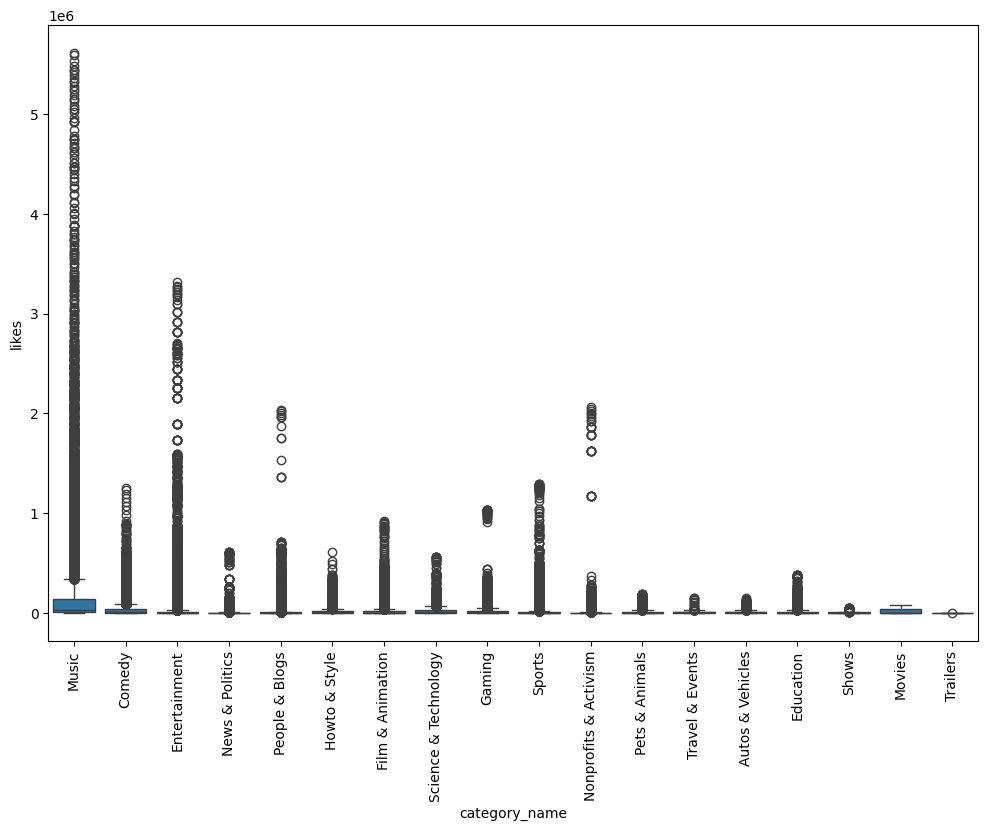

In [276]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'category_name', y = 'likes', data = full_df)
plt.xticks(rotation = 'vertical')
plt.show()

In [277]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [278]:

full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

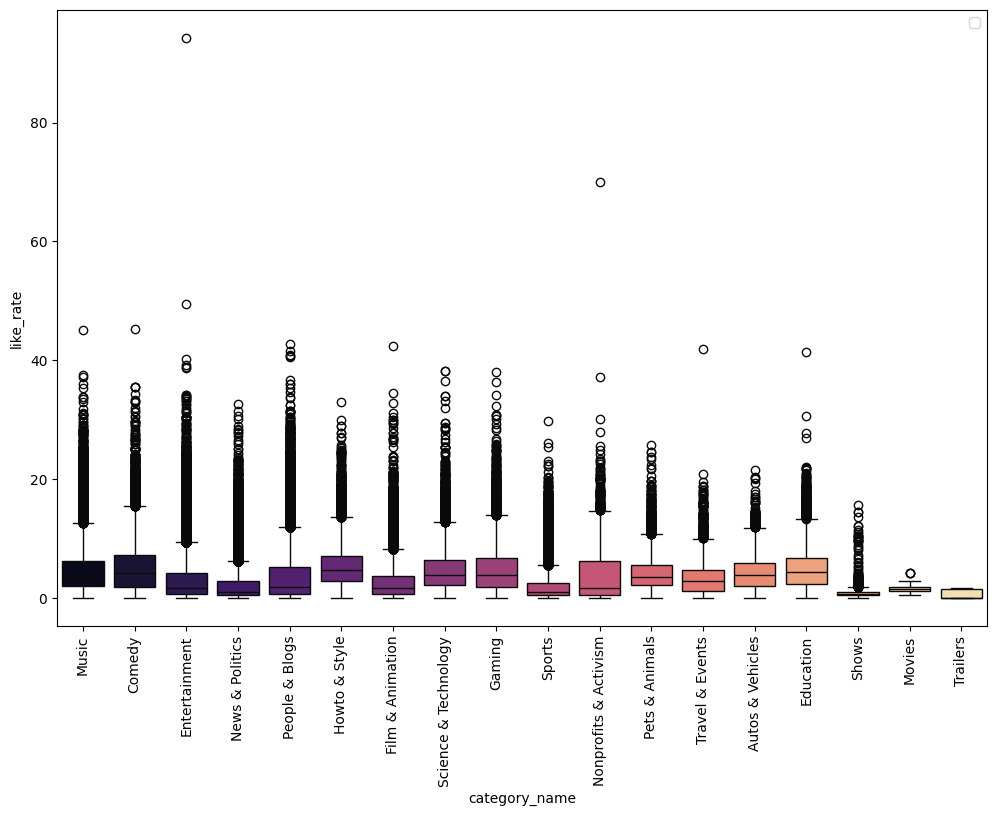

In [195]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'category_name', y = 'like_rate', data = full_df, palette='magma')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

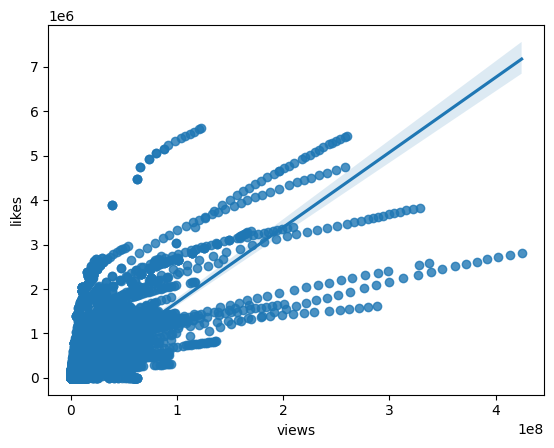

In [279]:
sns.regplot(x = 'views', y = 'likes', data = full_df)
plt.show()

In [280]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [281]:
full_df[['likes','dislikes','views']].corr()

,likes,dislikes,views
likes,1.000000,0.451669,0.779476
dislikes,0.451669,1.000000,0.405421
views,0.779476,0.405421,1.000000


<Axes: >

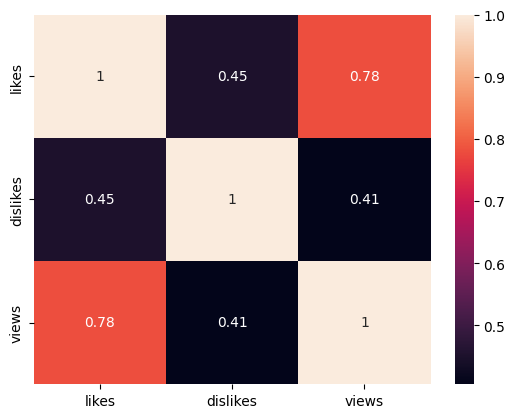

In [282]:
sns.heatmap(full_df[['likes','dislikes','views']].corr(), annot = True)


In [283]:
full_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert                                                                                                 711
WWE                                                                                                                                647
Late Night with Seth Meyers                                                                                                        597
TheEllenShow                                                                                                                       556
Jimmy Kimmel Live                                                                                                                  532
                                                                                                                                  ... 
Ã¥Â°ÂÃ¥ÂºÂ·Ã¦ÂÂ°Ã¦ÂÂ
Ã¥Â®Â¤                                                                                                       1
ÃÂÃÂ¨ÃÂÃÂ§ÃÂÃÂ                 

In [288]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending = False).reset_index()

In [298]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,711
1,WWE,647
2,Late Night with Seth Meyers,597
3,TheEllenShow,556
4,Jimmy Kimmel Live,532
...,...,...
37857,The Abundant World,1
37858,The 86th Floor: Cosplay and Cons,1
37859,That's Amazing,1
37860,!BTSã»TWICE ã¾ã¨ã,1


In [297]:
cdf.rename(columns = {0: 'total_videos'}, inplace = True)

In [307]:
import plotly.express as px
import plotly.offline as pyo

fig = px.bar(
    data_frame = cdf[0:20],
    x = 'channel_title',
    y = 'total_videos',
    title = 'Total Videos by Channel',
    labels = {'channel_title': 'Channel Name', 'total_videos': 'Total Videos'}
)

pyo.plot(fig)

'temp-plot.html'

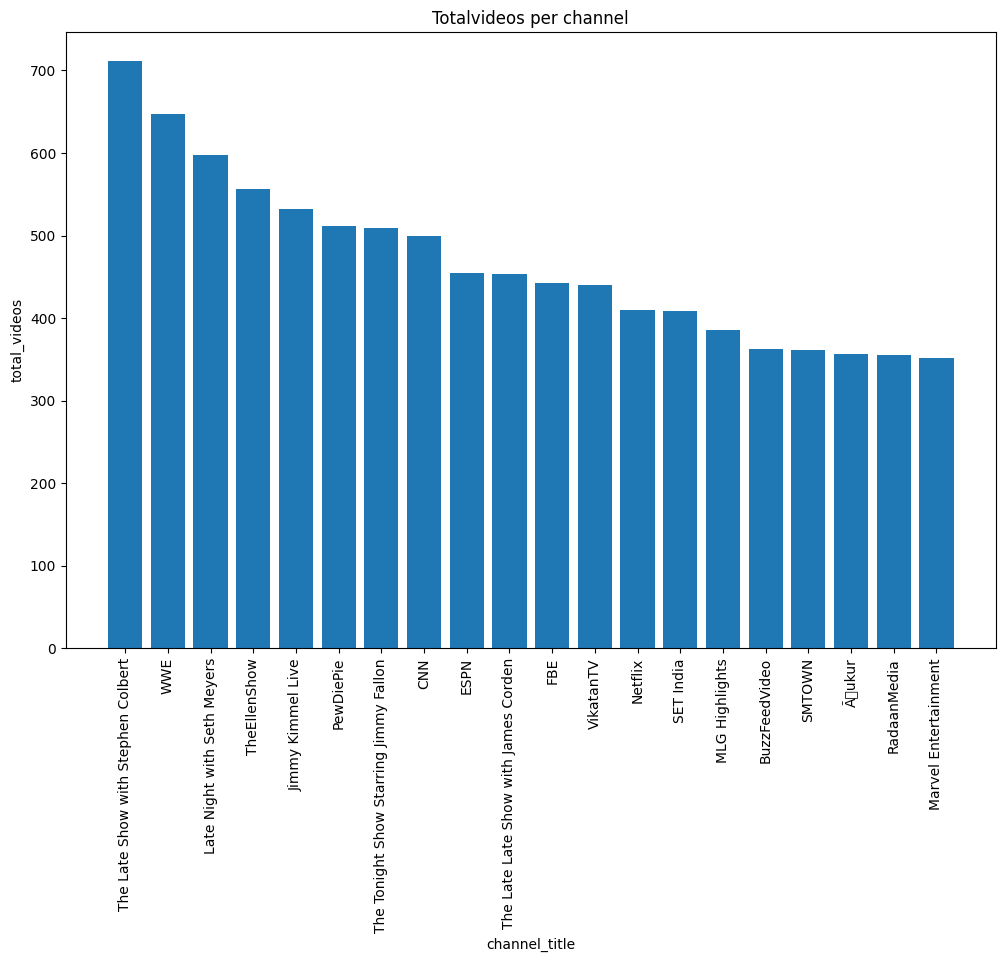

In [319]:
plt.figure(figsize=(12,8))
plt.bar(cdf['channel_title'][0:20],cdf['total_videos'][0:20])
plt.title('Totalvideos per channel')
plt.xlabel('channel_title')
plt.ylabel('total_videos')
plt.xticks(rotation = 'vertical')
plt.show()

In [320]:
full_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [321]:
import string

In [322]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [325]:
len([char for char in full_df['title'][0] if char in string.punctuation])

4

In [333]:
def punc_counter(text):
    return len([char for char in text if char in string.punctuation])


In [334]:
full_df['count_punc'] = full_df['title'].apply(punc_counter)

In [336]:
full_df.shape

(340124, 21)

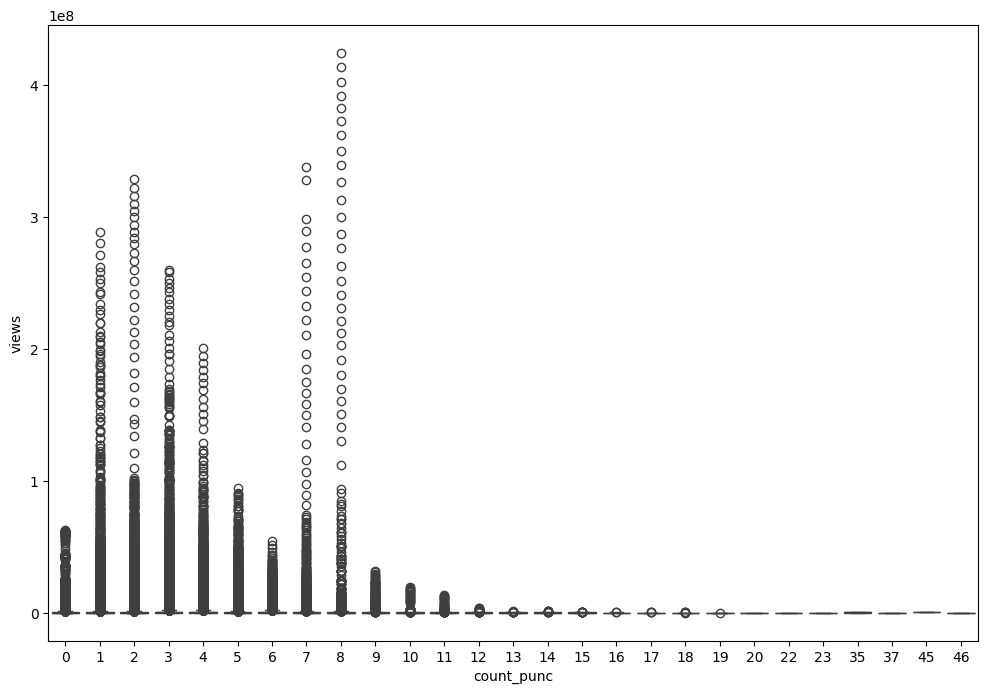

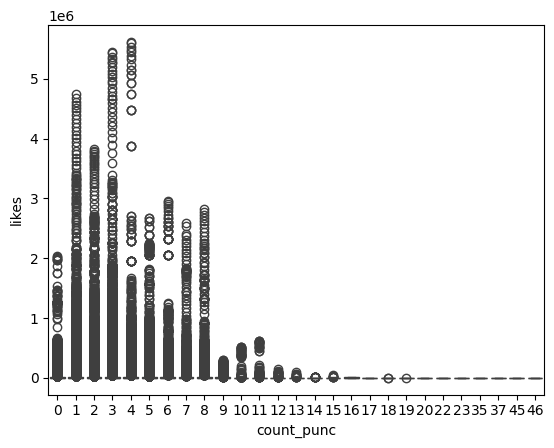

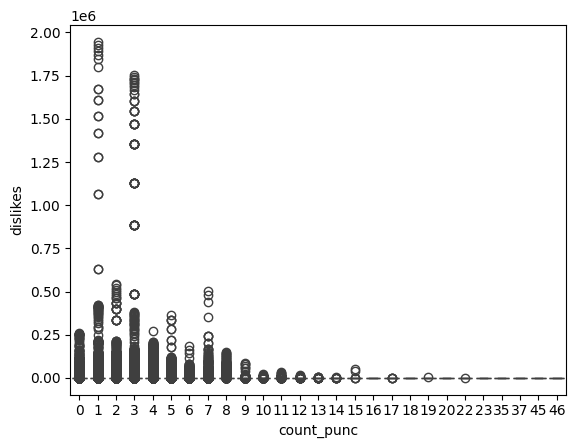

In [344]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'count_punc', y = 'views', data = full_df)
plt.show()
sns.boxplot(x = 'count_punc', y = 'likes', data = full_df)
plt.show()
sns.boxplot(x = 'count_punc', y = 'dislikes', data = full_df)
plt.show()